In [96]:
import os
import numpy as np
from collections import OrderedDict as OD
import math
#import uproot3
import uproot as uproot
import hist
import matplotlib.pyplot as plt
import mplhep as hep



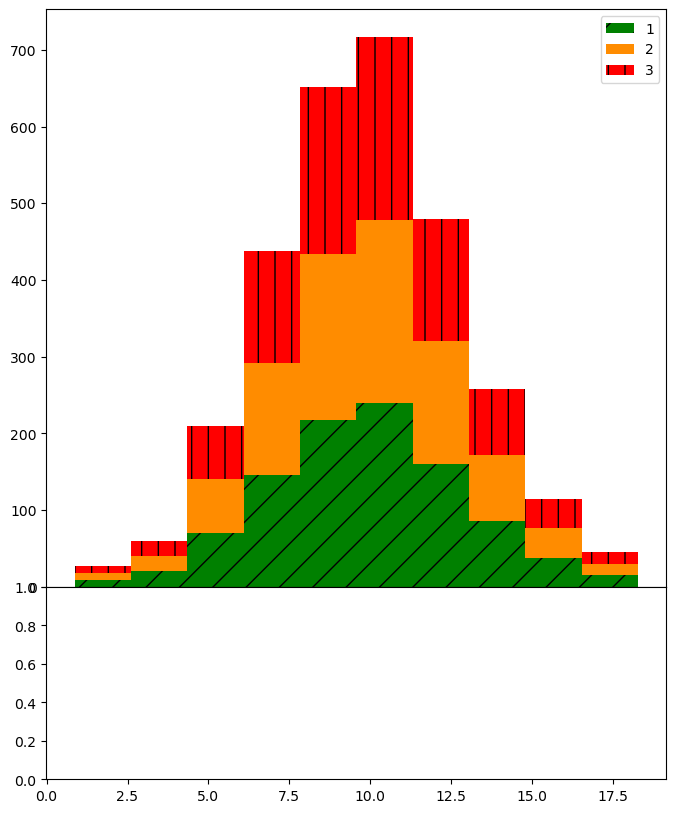

In [97]:
np.random.seed(0)
h001, bins = np.histogram(np.random.normal(10, 3, 1000), bins=10)

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8,10), sharex='col', gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})

hep.histplot(
    [h001, h001, h001],
    bins,
    label=["1", "2", "3"],
    histtype="fill",
    #binwnorm=[0.5, 3, 6],
    #linestyle=["--", ":"],
    color=["green", "darkorange", "red"],
    #alpha=[0.4, 0.7, 0.2],
    hatch=['/', '', '|'],
    ax=ax[0],
    stack=True,
)
ax[0].legend()



 histo_name_toUse = 'hLeadingFatJetPt_sel_leadingFatJetParticleNetMD_bbvsQCD', systematic = 'central', yAxisScale = 'logY', 
sBkg_list: ['QCD_2bCat', 'TTToHadronic_powheg', 'TTToSemiLeptonic_powheg'] 
hBkg_integral_list (total 415311.2384762212): [357847.9714013709, 33234.726089761156, 24228.540985089145] 
sBkg_list sorted by integral: [('QCD_2bCat', 357847.9714013709), ('TTToHadronic_powheg', 33234.726089761156), ('TTToSemiLeptonic_powheg', 24228.540985089145)]
sStack_list: ['QCD_2bCat', 'TTToHadronic_powheg', 'TTToSemiLeptonic_powheg']
hBkgTot_values sum: 415311.23847622104
h001 (<class 'numpy.ndarray'>): [  9  20  70 146 217 239 160  86  38  15] 
hStack_values_list[0] (<class 'numpy.ndarray'>): [    0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.    

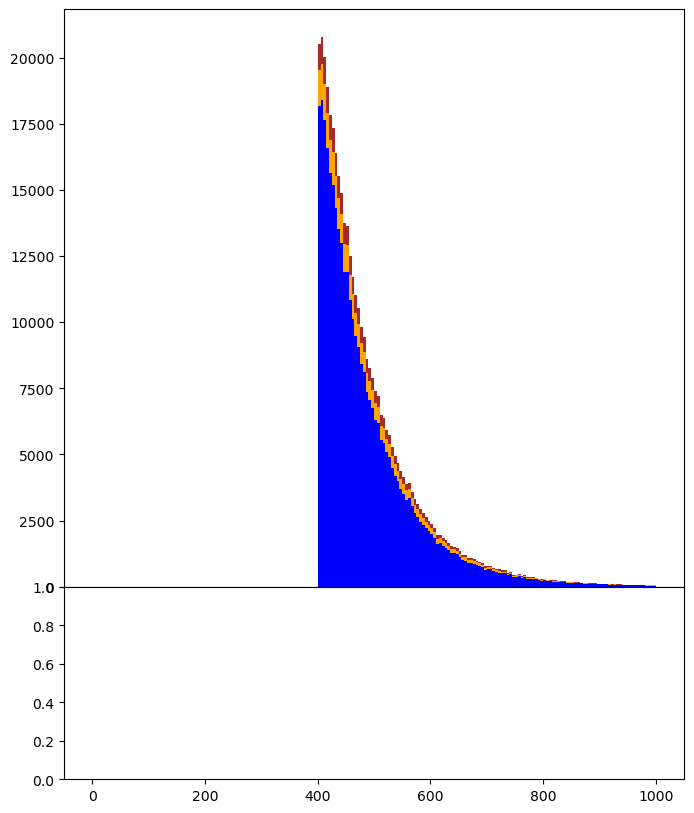

In [98]:
sIpFile = '/eos/cms/store/user/ssawant/htoaa/analysis/20230831_SelPNetMDXbbNSV/2018/analyze_htoaa_stage1.root'
sOpDir  = '/eos/cms/store/user/ssawant/htoaa/analysis/20230831_SelPNetMDXbbNSV/2018/plots'

    
fIpFile = uproot.open(sIpFile)


sXRange = "xAxisRange"; sYRange = "yAxisRange";
sXLabel = 'xAxisLabel'; sYLabel = 'yAxisLabel';

era = 2018
luminosity = 54.54  #59.83
cmsWorkStatus='Work in Progress'

sData = '' # "Data"
#MCBkg_list = ['QCD_bEnrich', 'QCD_bGen', 'QCD_Incl', 'TTJets_NLO', 'WJetsToQQ_HT', 'ZJetsToQQ_HT']
#MCBkg_list = ['QCD_bEnrich', 'QCD_bGen', 'QCD_Incl', 'TTJets_HT', 'WJetsToQQ_HT', 'ZJetsToQQ_HT']
#MCBkg_list = ['QCD_bEnrich', 'QCD_bGen', 'QCD_Incl', 'TTJets_Incl', 'WJetsToQQ_HT', 'ZJetsToQQ_HT']
#MCBkg_list = ['QCD_0bCat', 'QCD_1bCat', 'QCD_2bCat', 'QCD_3bCat', 'QCD_4bCat', 'QCD_5bAndMoreCat',  'TTJets_NLO', 'WJetsToQQ_HT', 'ZJetsToQQ_HT']
#MCBkg_list = ['QCD_0bCat', 'QCD_1bCat', 'QCD_2bCat', 'QCD_3bCat', 'QCD_4bCat', 'QCD_5bAndMoreCat',  'TTToHadronic_powheg', 'TTToSemiLeptonic_powheg', 'TTTo2L2Nu_powheg', 'WJetsToQQ_HT', 'ZJetsToQQ_HT']
MCBkg_list = ['QCD_2bCat', 'TTToHadronic_powheg', 'TTToSemiLeptonic_powheg']
MCSig_list = ['SUSY_GluGluH_01J_HToAATo4B_M-20_HPtAbv150']
sLableSig = 'HToAATo4B_M-20'
systematics_list = ['central']
systematics_forData = 'noweight'
selectionTags = ['sel_leadingFatJetParticleNetMD_bbvsQCD'] #['SR', 'sel_leadingFatJetMSoftDrop', ]

scale_MCSig = 50 #1000

histograms_dict = OD([
    ("hLeadingFatJetPt", {sXLabel: 'hLeadingFatJetPt', sYLabel: 'Events', sXRange: [180, 1000] }),
])

colors_bkg_list = ['blue', 'orange', 'brown'] # ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"] #['lightcoral', 'burlywood', 'cyan', 'saddlebrown', 'slateblue', 'lightpink', 'darkkhaki', 'antiquewhite', 'limegreen', 'violet', 'firebrick', 'darkorchid', 'tan', 'olive', 'purple']


for selectionTag in selectionTags:    
    for histo_name in histograms_dict.keys():
        histo_name_toUse = '%s_%s' % (histo_name, selectionTag)
        for systematic in systematics_list:
            for yAxisScale in ['logY']: # ['linearY'], 'logY'

                xAxisRange = histograms_dict[histo_name][sXRange] if sXRange in histograms_dict[histo_name].keys() else None
                yAxisRange = histograms_dict[histo_name][sYRange] if sYRange in histograms_dict[histo_name].keys() else None
                xAxisLabel = histograms_dict[histo_name][sXLabel] if sXLabel in histograms_dict[histo_name].keys() else None
                yAxisLabel = histograms_dict[histo_name][sYLabel] if sYLabel in histograms_dict[histo_name].keys() else None
                yAxisRange_cal = [1e20, -1e10]

                print(f"\n\n {histo_name_toUse = }, {systematic = }, {yAxisScale = }, ")
                #fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,10), sharex='col', gridspec_kw={'height_ratios': [3, 1]}, subplot_kw={'ymargin': 0.4})
                fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8,10), sharex='col', gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})

                hData = None
                hBkgTot_values = None
                hBkgTot_variance = None
                if len(MCBkg_list) > 0:
                    hBkg_list = []
                    sBkg_list = []
                    hBkg_integral_list = []
                    for dataset in MCBkg_list:
                        histo_name_toUse_full = 'evt/%s/%s_%s' % (dataset, histo_name_toUse, systematic)
                        h = fIpFile[histo_name_toUse_full].to_hist()

                        nTot_ = h.values().sum()
                        hBkg_list.append(h)
                        sBkg_list.append(dataset)
                        hBkg_integral_list.append(nTot_)

                        if abs(nTot_ - 0) < 1e-10: continue
                        #print(f"{histo_name_toUse_full} integral: {h.values.sum()}")
                        '''
                        yMin_ = getNonZeroMin(h.values())
                        yMax_ = np.max(h.values())
                        if yMin_ < yAxisRange_cal[0]:
                            yAxisRange_cal[0] = yMin_
                        if yMax_ > yAxisRange_cal[1]:
                            yAxisRange_cal[1] = yMax_  
                        '''                      


                    # sort histograms in decreasing yield
                    isReverseSortForStack = True
                    idx_hBkg_sortedByIntegral = sorted(range(len(hBkg_integral_list)), key=lambda i: hBkg_integral_list[i], reverse=isReverseSortForStack)            

                    print(f"sBkg_list: {sBkg_list} \nhBkg_integral_list (total {sum(hBkg_integral_list)}): {hBkg_integral_list} ")
                    print(f"sBkg_list sorted by integral: {[(sBkg_list[idx], hBkg_integral_list[idx]) for idx in idx_hBkg_sortedByIntegral]}")            

                    hStack_list = [ hBkg_list[idx] for idx in idx_hBkg_sortedByIntegral ]  
                    sStack_list = [ sBkg_list[idx] for idx in idx_hBkg_sortedByIntegral ]  
                    print(f"sStack_list: {sStack_list}")

                    hStack_values_list    = np.array( [ h.values() for h in hStack_list ] )
                    hStack_variance_list  = np.array( [ h.variances() for h in hStack_list ] )
                    hStack_error_list     = np.array( [ np.sqrt(h.variances()) for h in hStack_list ] )
                    hStack_edges          = hData.axes[0].edges if sData else hStack_list[0].axes[0].edges

                    hBkgTot_values        = np.sum(hStack_values_list, axis=0)
                    hBkgTot_variance      = np.sum(hStack_variance_list, axis=0)
                    print(f"hBkgTot_values sum: {sum(hBkgTot_values)}")

                    # https://matplotlib.org/stable/gallery/shapes_and_collections/hatch_style_reference.html
                    
                    # plot stack
                    #hep.histplot(hStack_values_list, bins=hStack_edges, ax=ax[0], yerr=hStack_error_list, histtype='fill', stack=True, label=sStack_list, sort='yield')
                    #hep.histplot(hStack_values_list, bins=hStack_edges, ax=ax[0], yerr=hStack_error_list, histtype='step', stack=True, label=sStack_list, linestyle="--", color=["green", "black", (1, 0, 0, 0.4)])
                    #hep.histplot(hStack_values_list, bins=hStack_edges, ax=ax[0], histtype='fill', stack=True, label=sStack_list, color=["green", "darkorange", "red"])
                    hep.histplot(hStack_values_list, bins=hStack_edges, ax=ax[0], histtype='fill', stack=True, label=sStack_list, color=colors_bkg_list[:len(hStack_values_list)])

                    print(f"h001 ({type(h001)}): {h001} ")
                    print(f"hStack_values_list[0] ({type(hStack_values_list[0])}): {hStack_values_list[0]}")
                    '''
                    hep.histplot(
                        #[h001, h001, h001],
                        #bins,
                        hStack_values_list,
                        hStack_edges,
                        label=["1", "2", "3"],
                        histtype="fill",
                        #binwnorm=[0.5, 3, 6],
                        #linestyle=["--", ":"],
                        color=["green", "darkorange", "red"],
                        #alpha=[0.4, 0.7, 0.2],
                        hatch=['/', '', '|'],
                        ax=ax[0],
                        stack=True,
                    )
                    '''
                    '''
                    hep.histplot(
                        #[h001, h001, h001],
                        #bins,
                        hStack_values_list,
                        bins=hStack_edges,
                        ax=ax[0],
                        histtype="fill",
                        stack=True,
                        label=sStack_list,
                        #binwnorm=[0.5, 3, 6],
                        #linestyle=["--", ":"],
                        color=["green", "darkorange", "red"],
                        #alpha=[0.4, 0.7, 0.2],
                        #hatch=['/', '', '|'],   
                    )
                    '''
